Dalam setiap pelatihan, peserta selalu diberi evaluasi mengenai beberapa hal termasuk First Response & Average Handling serta Customer Effort Score

#### First Response & Average Handling
Serangkaian pertanyaan yang menilai seberapa responsif penyelenggara dalam menanggapi customer

#### Customer Effort Score
Serangkaian pertanyaan yang menilai terkait upaya yang dilakukan customer untuk memenuhi kebutuhannya
Data Cuctomer Effort Score dikategorikan menjadi CES Tinggi dan CES Rendah

Dalam assignment ini dilihat prediksi First Response terhadapat Kategori Customer Effort Score

In [11]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
mpl.style.use(['ggplot'])

%matplotlib inline

# reading csv data
feedback_Lat = pd.read_excel('dataset/Feedback_Lat2_2020.xlsx')

In [12]:
feedback_Lat.head(10)

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,JML UBPP Inst,JML UBPP Delivery,UBPP Penyelenggaraan,UBPP Materi,Net Promotor Score,Customer Satisfaction,Customer Satisfaction Category,First Response & Average Handling,Customer Effort Score,Customer Effort Score Category
0,Exam AWS Cloud Practitioner Essentials 1,80114054,LAT,Test Online,Bandung,Learning Area 3 Bandung,DSP,Telkom Corporate University,Internal,Public,...,0,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi
1,Exam AWS Cloud Practitioner Essentials 3,80114058,LAT,Test Online,Bandung,Learning Area 3 / LO Bandung,DSP,Telkom Corporate University,Internal,Public,...,0,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi
2,Certified Product Manager,80113434,LAT,Test Online,Makassar,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Public,...,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi
3,Sequence Models,80113230,LAT,Seminar,Makassar,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Public,...,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi
4,Go From Zero to Hero in Python 3,80112311,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,0,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi
5,The Complete Node.js Developer Course,80112312,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi
6,Node.js API Masterclass Express MongoDB,80112313,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi
7,Galera Cluster and MariaDB MySQL Replica,80112389,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,0,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi
8,Node with React: Fullstack Web Dev,80112394,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi
9,Learn Perl 5 By Doing It,80112395,LAT,Test Online,Bandung,Learning Area 3 / LO,DSP,Online (Lokasi Masing-Masing),External,Public,...,1,1,100.0,100.0,100.0,100.0,Satisfaction Tinggi,100.0,100.0,CES Tinggi


In [13]:
feedback_Lat['Tgl Mulai'] = pd.to_datetime(feedback_Lat['Tgl Mulai'])

In [14]:
feedback_Lat['Bulan'] = feedback_Lat['Tgl Mulai'].dt.month

In [15]:
df_data = pd.DataFrame(feedback_Lat)
df_data.drop(['Nama Pelatihan', 'Objid Pelatihan', 'Category', 'Tipe', 'Lokasi Pelatihan', 'Provider', 'Academy Event', 'Location', 'Provider Category', 'Event Type', 'Status', 'Tgl Mulai', 'Tgl Selesai', 'JML Peserta', 'JML Confirmed', 'JML Peserta Hadir', 'JML UBPP Inst', 'JML UBPP Delivery', 'UBPP Penyelenggaraan', 'UBPP Materi', 'Net Promotor Score', 'Customer Satisfaction'], axis=1, inplace=True)
df_data.dropna(inplace=True)
df_data

,Customer Satisfaction Category,First Response & Average Handling,Customer Effort Score,Customer Effort Score Category,Bulan
0,Satisfaction Tinggi,100.00,100.0,CES Tinggi,12
1,Satisfaction Tinggi,100.00,100.0,CES Tinggi,11
2,Satisfaction Tinggi,100.00,100.0,CES Tinggi,9
3,Satisfaction Tinggi,100.00,100.0,CES Tinggi,8
4,Satisfaction Tinggi,100.00,100.0,CES Tinggi,4
...,...,...,...,...,...
930,Satisfaction Rendah,76.67,65.0,CES rendah,10
931,Satisfaction Rendah,70.00,48.0,CES rendah,10
932,Satisfaction Rendah,40.00,40.0,CES rendah,8
933,Satisfaction Rendah,50.00,38.0,CES rendah,8


In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 0 to 934
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer Satisfaction Category     935 non-null    object 
 1   First Response & Average Handling  935 non-null    float64
 2   Customer Effort Score              935 non-null    float64
 3   Customer Effort Score Category     935 non-null    object 
 4   Bulan                              935 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 43.8+ KB


# Logistic Regression

In [17]:
# Prediksi Category Customer Effort Score berdasarkan First Response & Average Handling
# data_x = First Response & Average Handling
# data_y = Category Customer Effort Score

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [19]:
list(df_data.columns)

['Customer Satisfaction Category',
 'First Response & Average Handling',
 'Customer Effort Score',
 'Customer Effort Score Category',
 'Bulan']

In [20]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df_data[['First Response & Average Handling']], df_data[['Customer Effort Score Category']], test_size=0.2, random_state=0)

In [21]:
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((748, 1), (187, 1), (748, 1), (187, 1))

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [23]:
x_train.shape

(748, 1)

In [24]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)

/Users/sadida/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [25]:
model.classes_

array(['CES Tinggi', 'CES rendah'], dtype=object)

In [26]:
x_test = scaler.transform(x_test)

In [27]:
model.predict_proba(x_train)

array([[0.49954294, 0.50045706],
       [0.90631761, 0.09368239],
       [0.00340161, 0.99659839],
       ...,
       [0.97110914, 0.02889086],
       [0.19444288, 0.80555712],
       [0.60309163, 0.39690837]])

In [28]:
y_pred = model.predict(x_test)

In [29]:
# akurasi data train
model.score(x_train, y_train)

0.8636363636363636

In [30]:
# akurasi data test
metrics.accuracy_score(y_pred, y_test)

0.8556149732620321

In [31]:
confusion_matrix(y_test, y_pred)

array([[127,   8],
       [ 19,  33]])

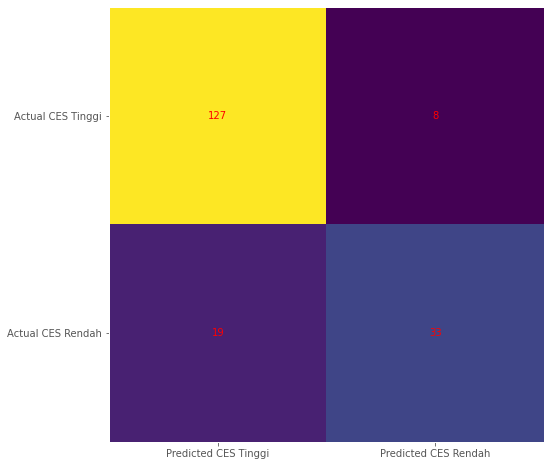

In [32]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted CES Tinggi', 'Predicted CES Rendah'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual CES Tinggi', 'Actual CES Rendah'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# KNN

In [33]:
# Prediksi Category Customer Effort Score berdasarkan First Response & Average Handling
# data_x = First Response & Average Handling
# data_y = Category Customer Effort Score

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [35]:
(df_data[['First Response & Average Handling']].shape, df_data[['Customer Effort Score Category']].shape)

((935, 1), (935, 1))

In [36]:
#Split Data
knn_x_train, knn_x_test, knn_y_train, knn_y_test = train_test_split(df_data[['First Response & Average Handling']], df_data['Customer Effort Score Category'], test_size=0.2, random_state=0)

In [37]:
(knn_x_train.shape, knn_x_test.shape, knn_y_train.shape, knn_y_test.shape)

((748, 1), (187, 1), (748,), (187,))

In [38]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(knn_x_train, knn_y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(knn_x_test)

In [39]:
# Akurasi Model
metrics.accuracy_score(y_pred_knn, knn_y_test)

0.8235294117647058

# SVM

In [40]:
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score

In [41]:
(df_data[['First Response & Average Handling']].shape, df_data[['Customer Effort Score Category']].shape)

((935, 1), (935, 1))

In [42]:
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(df_data[['First Response & Average Handling']], df_data['Customer Effort Score Category'], test_size=0.2, random_state=0)

In [43]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train_svm, y_train_svm) 

#Predict the response for test dataset
y_pred_svm = clf.predict(x_test_svm)

In [44]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))

Accuracy: 0.8556149732620321


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(df_data[['First Response & Average Handling']], df_data['Customer Effort Score Category'], test_size=0.2, random_state=0)

In [47]:
# Create Decision Tree classifer object
dct = DecisionTreeClassifier()

# Train Decision Tree Classifer
dct = dct.fit(x_train_dt,y_train_dt)

#Predict the response for test dataset
y_pred = dct.predict(x_test_dt)

In [48]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8235294117647058


# Random Forest

In [49]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(df_data[['First Response & Average Handling']], df_data['Customer Effort Score Category'], test_size=0.2, random_state=0)

In [50]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train_rf, y_train_rf) 

y_pred_rfc=rfc.predict(x_test_rf)

In [51]:
print("Accuracy Random Forest:",metrics.accuracy_score(y_test_rf, y_pred_rfc))

Accuracy Random Forest: 0.8288770053475936


# Naive Bayes

In [52]:
x_train_nbc, x_test_nbc, y_train_nbc, y_test_nbc = train_test_split(df_data[['First Response & Average Handling']], df_data['Customer Effort Score Category'], test_size=0.2, random_state=0)

In [53]:
(x_train_nbc.shape, x_test_nbc.shape, y_train_nbc.shape, y_test_nbc.shape)

((748, 1), (187, 1), (748,), (187,))

In [54]:
from sklearn.naive_bayes import GaussianNB 
nbc=GaussianNB()
nbc.fit(x_train_nbc, y_train_nbc)
(x_train_nbc.shape, y_train_nbc.shape)
y_pred_nbc = nbc.predict(x_test_nbc)

In [55]:
print(x_train_nbc)

     First Response & Average Handling
386                              85.00
624                              91.00
892                              70.00
85                               96.46
812                              78.46
..                                 ...
835                              82.31
192                              92.50
629                              94.29
559                              81.25
684                              86.11

[748 rows x 1 columns]


In [56]:
print("Accuracy Naive Bayes:",metrics.accuracy_score(y_test_nbc, y_pred_nbc))

Accuracy Naive Bayes: 0.8235294117647058


# Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
x_train_nbc, x_test_nbc, y_train_nbc, y_test_nbc = train_test_split(df_data[['First Response & Average Handling']], df_data['Customer Effort Score Category'], test_size=0.2, random_state=0)

In [59]:
cm = confusion_matrix(y_test_nbc, y_pred_nbc)
cm

array([[129,   6],
       [ 27,  25]])

# Visualization

## Visualisasi Eror Rate dengan KNN

Text(0, 0.5, 'Error mean')

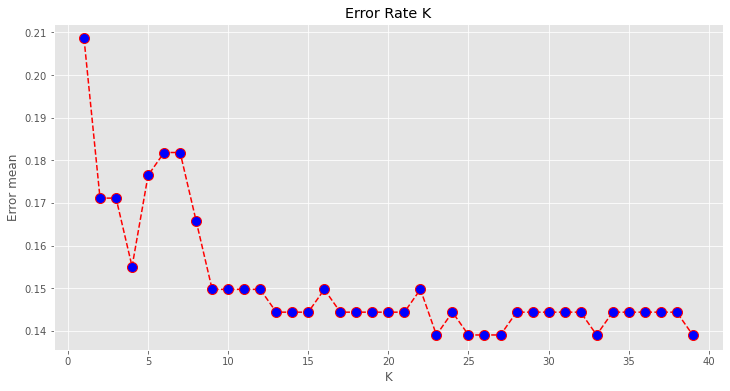

In [60]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knn_x_train, knn_y_train)
    pred_i = knn.predict(knn_x_test)
    error.append(np.mean(pred_i != knn_y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

## Visualisasi Confusion Matrix dengan Algoritma Naive Bayes

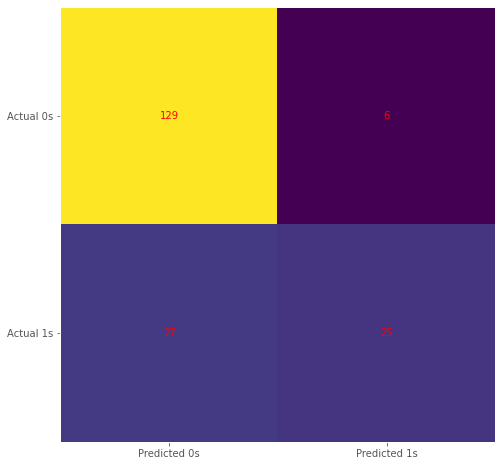

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()